In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def initialize_network(n,m,p,q,r,s,t):
    network = nx.DiGraph()

    #populate the network with n participants
    for i in range(n):
        network.add_node(i)
        network.nodes[i]['type']="participant"
    
    #populate the network with m artifacts
    for i in range(m):
        network.add_node(n+i)
        network.nodes[n+i]['type']="artifact"
        #add an "author" type edge to a participant node
        author = np.random.randint(0,n)
        network.add_edge(author,n+i)
        network.edges[author,n+i]['type']="author"

    #populate the network with p organizations
    for i in range(p):
        network.add_node(n+m+i)
        network.nodes[n+m+i]['type']="organization"
        #add a "member" type edge to a participant node
        member_count = np.random.randint(1,min(10,n/2))
        #choose member_count number of participants to be members of the organization
        members = np.random.choice(n,member_count,replace=False)
        for member in members:
            network.add_edge(member,n+m+i)
            network.edges[member,n+m+i]['type']="member"

    #populate the network with q attributes
    for i in range(q):
        network.add_node(n+m+p+i)
        network.nodes[n+m+p+i]['type']="attribute"

    #populate the network with r evaluators
    for i in range(r):
        network.add_node(n+m+p+q+i)
        network.nodes[n+m+p+q+i]['type']="evaluator"
        #for each evaluator assign an organization as its operator and an attribute as its target
        operator = np.random.randint(n+m,n+m+p)
        network.add_edge(operator,n+m+p+q+i)
        network.edges[operator,n+m+p+q+i]['type']="operator"
        target = np.random.randint(n+m+p,n+m+p+q)
        network.add_edge(n+m+p+q+i,target)
        network.edges[n+m+p+q+i,target]['type']="target"

    #populate the network with s claims
    for i in range(s):
        network.add_node(n+m+p+q+r+i)
        network.nodes[n+m+p+q+r+i]['type']="claim"
        #for each claim assign a participant as its claimant
        claimant = np.random.randint(0,n)
        network.add_edge(claimant,n+m+p+q+r+i)
        network.edges[claimant,n+m+p+q+r+i]['type']="claimant"
        #for each claim assign an evaluator the claim is being made about
        evaluator = np.random.randint(n+m+p+q,n+m+p+q+r)
        network.add_edge(n+m+p+q+r+i,evaluator)
        network.edges[n+m+p+q+r+i,evaluator]['type']="claimed_about"
        #for each claim assign an artifact the claim is being made for
        artifact = np.random.randint(n,n+m)
        network.add_edge(n+m+p+q+r+i,artifact)
        network.edges[n+m+p+q+r+i,artifact]['type']="claimed_for"
        #randomly assign a truth value to the claim
        truth = np.random.choice([True,False])
        network.nodes[n+m+p+q+r+i]['value']=truth

    #populate the network with t evaluations
    for i in range(t):
        network.add_node(n+m+p+q+r+s+i)
        network.nodes[n+m+p+q+r+s+i]['type']="evaluation"
        #for each evaluation assign an evaluator as its evaluator
        evaluator = np.random.randint(n+m+p+q,n+m+p+q+r)
        network.add_edge(evaluator,n+m+p+q+r+s+i)
        network.edges[evaluator,n+m+p+q+r+s+i]['type']="evaluated_by"
        #for each evaluation assign artifact as its recipient
        recipient = np.random.randint(n,n+m)
        network.add_edge(n+m+p+q+r+s+i,recipient)
        network.edges[n+m+p+q+r+s+i,recipient]['type']="recipient"
        #for each evaluation assign a truth value to the evaluation
        truth = np.random.choice([True,False])
        network.nodes[n+m+p+q+r+s+i]['value']=truth

    return network


In [3]:
def get_nodes_by_type(g, node_type_selection):
    return [node for node in g.nodes if g.nodes[node]['type']== node_type_selection ]

def get_edges_by_type(g, edge_type_selection):
    return [edge for edge in g.edges if g.edges[edge]['type']== edge_type_selection ]

def get_neighbors_by_type(g, node, neighbor_type_selection):
    neighbors = []
    for n in g.nodes:
        if g.has_edge(node, n) or g.has_edge(n, node):
            if g.nodes[n]['type'] == neighbor_type_selection:
                neighbors.append(n)
    return neighbors

def get_all_neighbors(g, node):
    neighbors = []
    for n in g.nodes:
        if g.has_edge(node, n) or g.has_edge(n, node):
            neighbors.append(n)
    return neighbors


In [4]:
#initialize the network
n = 10 #number of participants
m = 10 #number of artifacts
p = 3 #number of organizations
q = 5 #number of attributes
r = 10 #number of evaluators
s = 150 #number of claims
t = 75 #number of evaluations

network = initialize_network(n,m,p,q,r,s,t)


In [5]:
# check that all artifacts have an author which is a participant
for artifact in get_nodes_by_type(network, "artifact"):
    authors = get_neighbors_by_type(network, artifact, "participant")
    if len(authors) == 0:
        print("Error: Artifact " + str(artifact) + " has no author")
    elif len(authors) > 1:
        print("Error: Artifact " + str(artifact) + " has more than one author")

#check that all organizations have members which are participants
for organization in get_nodes_by_type(network, "organization"):
    members = get_neighbors_by_type(network, organization, "participant")
    if len(members) == 0:
        print("Error: Organization " + str(organization) + " has no members")

#check that all evaluators have an operator which is an organization
for evaluator in get_nodes_by_type(network, "evaluator"):
    operators = get_neighbors_by_type(network, evaluator, "organization")
    if len(operators) == 0:
        print("Error: Evaluator " + str(evaluator) + " has no operator")
    elif len(operators) > 1:
        print("Error: Evaluator " + str(evaluator) + " has more than one operator")

#check that all evaluators have a target which is an attribute
for evaluator in get_nodes_by_type(network, "evaluator"):
    targets = get_neighbors_by_type(network, evaluator, "attribute")
    if len(targets) == 0:
        print("Error: Evaluator " + str(evaluator) + " has no target")
    elif len(targets) > 1:
        print("Error: Evaluator " + str(evaluator) + " has more than one target")

#check that all claims have a claimant which is a participant
for claim in get_nodes_by_type(network, "claim"):
    claimants = get_neighbors_by_type(network, claim, "participant")
    if len(claimants) == 0:
        print("Error: Claim " + str(claim) + " has no claimant")
    elif len(claimants) > 1:
        print("Error: Claim " + str(claim) + " has more than one claimant")

#check that all claims have a claimed_about which is an evaluator
for claim in get_nodes_by_type(network, "claim"):
    claimed_about = get_neighbors_by_type(network, claim, "evaluator")
    if len(claimed_about) == 0:
        print("Error: Claim " + str(claim) + " has no claimed_about")
    elif len(claimed_about) > 1:
        print("Error: Claim " + str(claim) + " has more than one claimed_about")

#check that all claims have a claimed_for which is an artifact
for claim in get_nodes_by_type(network, "claim"):
    claimed_for = get_neighbors_by_type(network, claim, "artifact")
    if len(claimed_for) == 0:
        print("Error: Claim " + str(claim) + " has no claimed_for")
    elif len(claimed_for) > 1:
        print("Error: Claim " + str(claim) + " has more than one claimed_for")

#check that all evaluations have an evaluated_by which is an evaluator
for evaluation in get_nodes_by_type(network, "evaluation"):
    evaluated_by = get_neighbors_by_type(network, evaluation, "evaluator")
    if len(evaluated_by) == 0:
        print("Error: Evaluation " + str(evaluation) + " has no evaluated_by")
    elif len(evaluated_by) > 1:
        print("Error: Evaluation " + str(evaluation) + " has more than one evaluated_by")

In [6]:
#summary statistics of the network
print("Number of nodes: ", network.number_of_nodes())
print("Number of edges: ", network.number_of_edges())
print("Number of participants: ", len(get_nodes_by_type(network,"participant")))
print("Number of artifacts: ", len(get_nodes_by_type(network,"artifact")))
print("Number of organizations: ", len(get_nodes_by_type(network,"organization")))
print("Number of attributes: ", len(get_nodes_by_type(network,"attribute")))
print("Number of evaluators: ", len(get_nodes_by_type(network,"evaluator")))
print("Number of claims: ", len(get_nodes_by_type(network,"claim")))
print("Number of evaluations: ", len(get_nodes_by_type(network,"evaluation")))
print("Number of author edges: ", len(get_edges_by_type(network,"author")))
print("Number of member edges: ", len(get_edges_by_type(network,"member")))
print("Number of operator edges: ", len(get_edges_by_type(network,"operator")))
print("Number of claimed_about edges: ", len(get_edges_by_type(network,"claimed_about")))
print("Number of evaluated_by edges: ", len(get_edges_by_type(network,"evaluated_by")))
print("Number of recipient edges: ", len(get_edges_by_type(network,"recipient")))
      


Number of nodes:  263
Number of edges:  636
Number of participants:  10
Number of artifacts:  10
Number of organizations:  3
Number of attributes:  5
Number of evaluators:  10
Number of claims:  150
Number of evaluations:  75
Number of author edges:  10
Number of member edges:  6
Number of operator edges:  10
Number of claimed_about edges:  150
Number of evaluated_by edges:  75
Number of recipient edges:  75


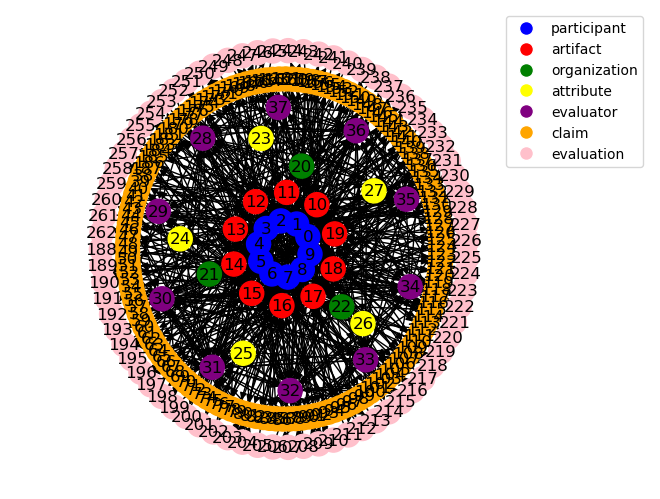

In [7]:
#plot the network
pos = nx.shell_layout(network, nlist=[range(n),range(n,n+m),range(n+m,n+m+p),range(n+m+p,n+m+p+q),range(n+m+p+q,n+m+p+q+r),range(n+m+p+q+r,n+m+p+q+r+s),range(n+m+p+q+r+s,n+m+p+q+r+s+t)])
# add colors to distinguish between different types of nodes
colors = []
for node in network.nodes:
    if network.nodes[node]['type']=="participant":
        colors.append('blue')
    elif network.nodes[node]['type']=="artifact":
        colors.append('red')
    elif network.nodes[node]['type']=="organization":
        colors.append('green')
    elif network.nodes[node]['type']=="attribute":
        colors.append('yellow')
    elif network.nodes[node]['type']=="evaluator":
        colors.append('purple')
    elif network.nodes[node]['type']=="claim":
        colors.append('orange')
    elif network.nodes[node]['type']=="evaluation":
        colors.append('pink')
nx.draw(network, pos, node_color=colors, with_labels=True)
#extend the bounding box of the plot to make room for the legend
plt.xlim(-1.5,2)
# add a legend which says which node type goes to each color
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='participant', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='artifact', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='organization', markerfacecolor='green', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='attribute', markerfacecolor='yellow', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='evaluator', markerfacecolor='purple', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='claim', markerfacecolor='orange', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='evaluation', markerfacecolor='pink', markersize=10)])

In [8]:
#create a method to plot a graph
def plotter(g):
    pos = nx.kamada_kawai_layout(g)
    # add colors to distinguish between different types of nodes
    colors = []
    for node in g.nodes:
        if g.nodes[node]['type']=="participant":
            colors.append('blue')
        elif g.nodes[node]['type']=="artifact":
            colors.append('red')
        elif g.nodes[node]['type']=="organization":
            colors.append('green')
        elif g.nodes[node]['type']=="attribute":
            colors.append('yellow')
        elif g.nodes[node]['type']=="evaluator":
            colors.append('purple')
        elif g.nodes[node]['type']=="claim":
            colors.append('orange')
        elif g.nodes[node]['type']=="evaluation":
            colors.append('pink')
    nx.draw(g, pos, node_color=colors, with_labels=True)
    #extend the bounding box of the plot to make room for the legend
    plt.xlim(-1.5,2)
    # add a legend which says which node type goes to each color
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='participant', markerfacecolor='blue', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='artifact', markerfacecolor='red', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='organization', markerfacecolor='green', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='attribute', markerfacecolor='yellow', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='evaluator', markerfacecolor='purple', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='claim', markerfacecolor='orange', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='evaluation', markerfacecolor='pink', markersize=10)])

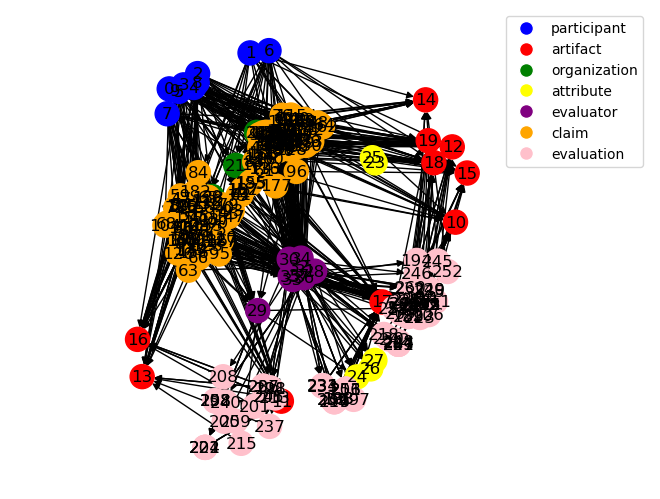

In [9]:
plotter(network)

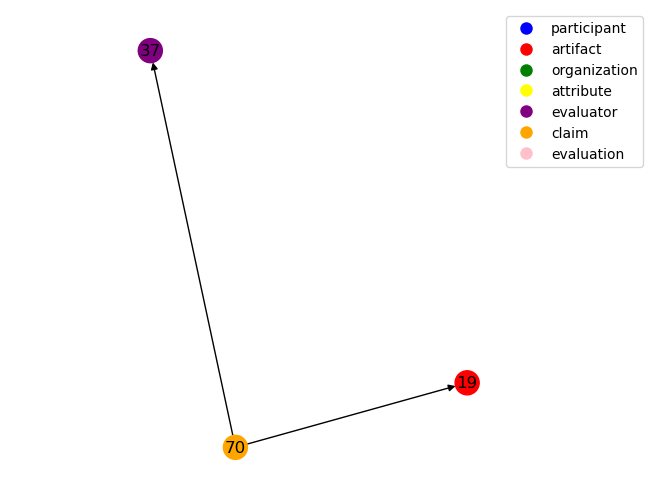

In [10]:
#plot the neighborhood of a node   
node = 70
neighborhood = get_neighbors_by_type(network,node,"artifact")
neighborhood.extend(get_neighbors_by_type(network,node,"organization"))
neighborhood.extend(get_neighbors_by_type(network,node,"attribute"))
neighborhood.extend(get_neighbors_by_type(network,node,"evaluator"))
neighborhood.extend(get_neighbors_by_type(network,node,"claim"))
neighborhood.extend(get_neighbors_by_type(network,node,"evaluation"))
neighborhood.append(node)
subgraph = plotter(network.subgraph(neighborhood))



In [11]:
def get_neighborhood(g, node, depth=2):
    visited = set()
    to_visit = [(node, 0)]
    neighborhood = []

    while to_visit:
        current_node, current_depth = to_visit.pop(0)
        if current_node not in visited:
            visited.add(current_node)
            neighborhood.append(current_node)
            if current_depth < depth:
                neighbors = get_neighbors_by_type(g, current_node, "artifact")
                neighbors.extend(get_neighbors_by_type(g, current_node, "organization"))
                neighbors.extend(get_neighbors_by_type(g, current_node, "attribute"))
                neighbors.extend(get_neighbors_by_type(g, current_node, "evaluator"))
                neighbors.extend(get_neighbors_by_type(g, current_node, "claim"))
                neighbors.extend(get_neighbors_by_type(g, current_node, "evaluation"))
                neighbors.extend(get_neighbors_by_type(g, current_node, "participant"))
                for neighbor in neighbors:
                    if neighbor not in visited:
                        to_visit.append((neighbor, current_depth + 1))
    return neighborhood


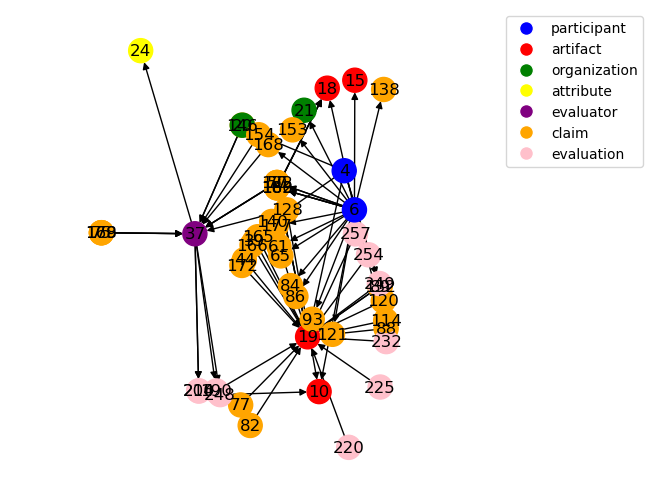

In [12]:
plotter(network.subgraph(get_neighborhood(network,70)))

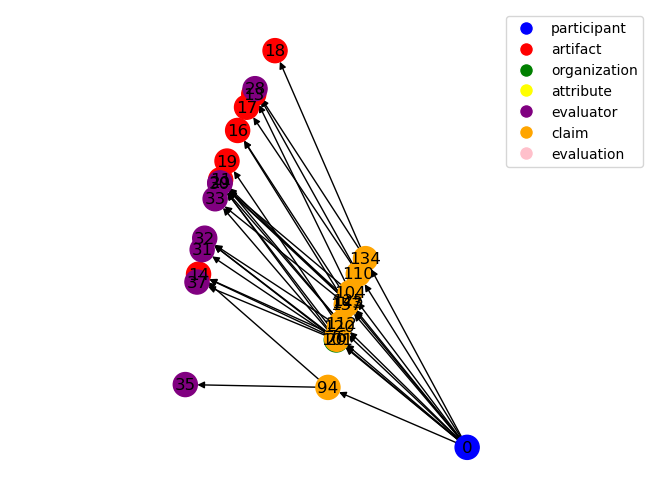

In [13]:
plotter(network.subgraph(get_neighborhood(network,0,2)))

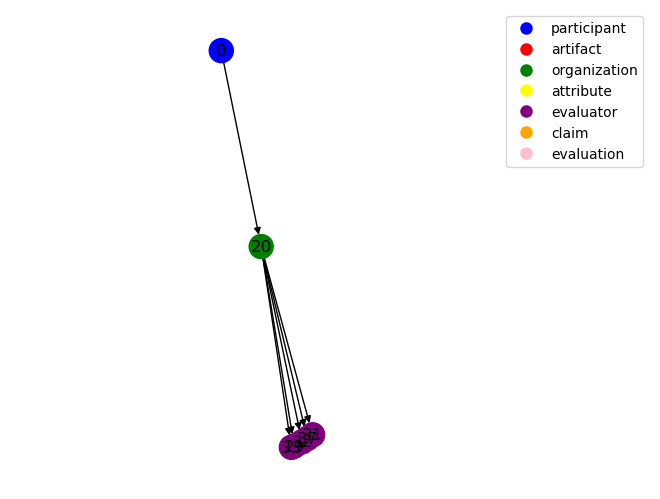

In [14]:
plotter(network.subgraph(get_neighborhood(network,20,1)))

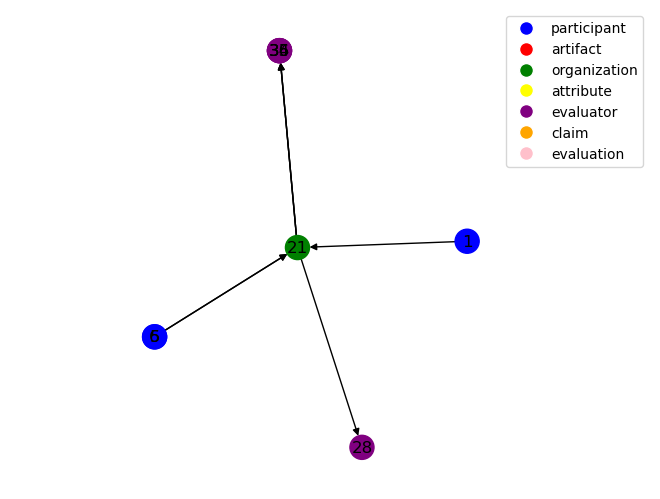

In [15]:
plotter(network.subgraph(get_neighborhood(network,21,1)))

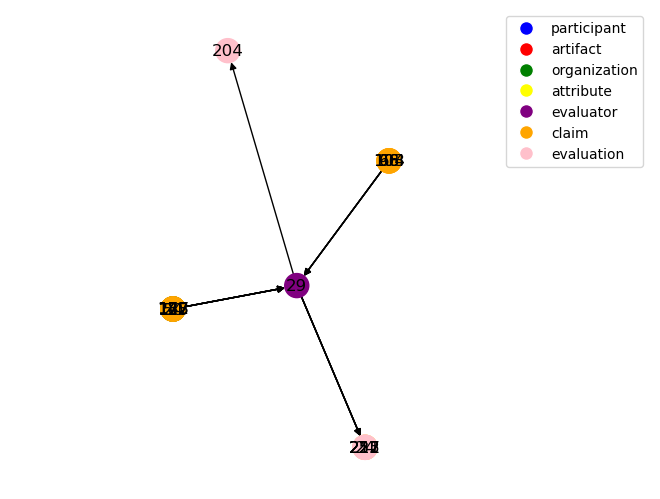

In [16]:
plotter(network.subgraph(get_neighborhood(network,29,1)))

In [17]:
import pandas as pd
data = []
for evaluation in get_nodes_by_type(network,"evaluation"):
    artifact = get_neighbors_by_type(network,evaluation,"artifact")[0]
    evaluator = get_neighbors_by_type(network,evaluation,"evaluator")[0]
    organization = get_neighbors_by_type(network,evaluator,"organization")[0]
    attribute = get_neighbors_by_type(network,evaluator,"attribute")[0]
    value = network.nodes[evaluation]['value']
    data.append([artifact,evaluator, organization, attribute, value])

df = pd.DataFrame(data, columns = ['artifact', 'evaluator', 'organization', 'attribute', 'value'])

In [18]:
df

,artifact,evaluator,organization,attribute,value
0,17,35,21,27,True
1,18,32,20,26,True
2,19,37,20,24,False
3,13,34,21,24,True
4,15,28,21,27,True
...,...,...,...,...,...
70,11,36,21,26,True
71,11,31,20,24,False
72,12,33,20,26,False
73,10,31,20,24,True


In [19]:
data2 = []
for claim in get_nodes_by_type(network,"claim"):
    claimant = get_neighbors_by_type(network,claim,"participant")[0]
    artifact = get_neighbors_by_type(network,claim,"artifact")[0]
    evaluator = get_neighbors_by_type(network,claim,"evaluator")[0]
    organization = get_neighbors_by_type(network,evaluator,"organization")[0]
    attribute = get_neighbors_by_type(network,evaluator,"attribute")[0]
    value = network.nodes[claim]['value']
    data2.append([claimant, artifact, evaluator, organization, attribute, value])  # Changed from data to data2

df2 = pd.DataFrame(data2, columns = ['claimant', 'artifact', 'evaluator', 'organization', 'attribute', 'value'])  # Changed from data to data2


In [20]:
df2

,claimant,artifact,evaluator,organization,attribute,value
0,2,18,31,20,24,False
1,5,19,32,20,26,False
2,7,11,36,21,26,False
3,3,16,35,21,27,True
4,4,17,31,20,24,True
...,...,...,...,...,...,...
145,1,17,34,21,24,False
146,2,14,28,21,27,True
147,5,10,28,21,27,True
148,8,15,32,20,26,True


<Axes: xlabel='claimant'>

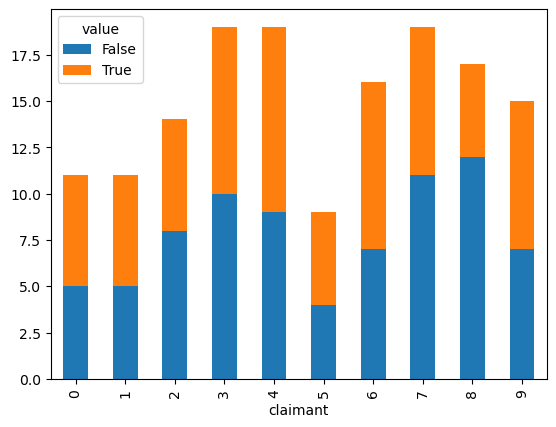

In [21]:
#plot the count of claims by claimant as a stacked bar chart colored by the value of the claim
df2.groupby(['claimant','value']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='attribute', ylabel='artifact'>

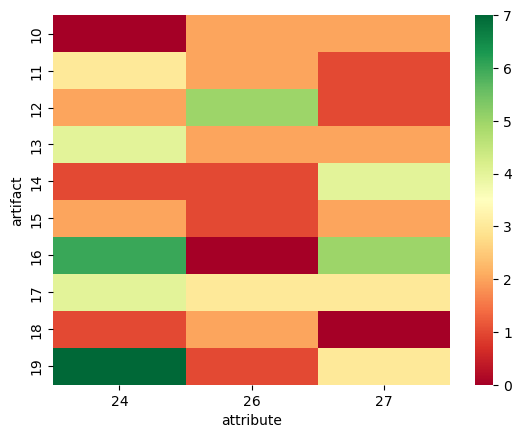

In [22]:
import seaborn as sns
#plot a heatmap of the count of artifacts by attributes with the hue being the sum of the integer of value of the claims, use red-yellow-green color palette
sns.heatmap(df2.groupby(['artifact','attribute'])['value'].sum().unstack(), cmap="RdYlGn")

<Axes: xlabel='attribute', ylabel='artifact'>

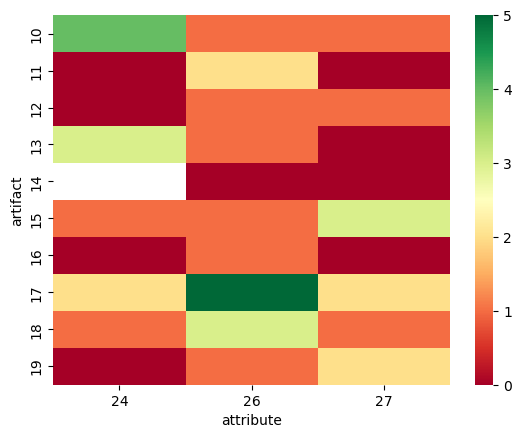

In [23]:
#plot a heatmap of the count of artifacts by attributes with the hue being the sum of the integer of value of the evaluations, use red-yellow-green color palette
sns.heatmap(df.groupby(['artifact','attribute'])['value'].sum().unstack(), cmap="RdYlGn")

In [24]:
get_nodes_by_type(network, "attribute")

[23, 24, 25, 26, 27]

In [25]:
#given the network create a method for a new participant to join the network
def new_participant(network):
    new_node = network.number_of_nodes()
    network.add_node(new_node)
    network.nodes[new_node]['type']="participant"
    return network

#given the network create a method for a new artifact to be created
def new_artifact(network):
    new_node = network.number_of_nodes()
    network.add_node(new_node)
    network.nodes[new_node]['type']="artifact"
    author = np.random.choice(get_nodes_by_type(network,"participant")) 
    network.add_edge(author,new_node)
    network.edges[author,new_node]['type']="author"
    return network

def new_organization(network):
    new_node = network.number_of_nodes()
    network.add_node(new_node)
    network.nodes[new_node]['type']="organization"
    member_count = np.random.randint(1,min(10,n/2))
    members = np.random.choice(get_nodes_by_type(network,"participant"),member_count,replace=False)
    for member in members:
        network.add_edge(member,new_node)
        network.edges[member,new_node]['type']="member"
    return network

def new_attribute(network):
    new_attr = network.number_of_nodes()
    network.add_node(new_attr)
    network.nodes[new_attr]['type']="attribute"

    new_node = network.number_of_nodes()
    network.add_node(new_node)
    network.nodes[new_node]['type']="evaluator"
    operator = np.random.choice(get_nodes_by_type(network,"organization"))
    network.add_edge(operator,new_node)
    network.edges[operator,new_node]['type']="operator"
    target = new_attr
    network.add_edge(new_node,target)
    network.edges[new_node,target]['type']="target"
    return network

def new_claim(network):
    new_claim = network.number_of_nodes()
    network.add_node(new_claim)
    network.nodes[new_claim]['type']="claim"
    claimant = np.random.choice(get_nodes_by_type(network,"participant"))
    network.add_edge(claimant,new_claim)
    network.edges[claimant,new_claim]['type']="claimant"
    evaluator = np.random.choice(get_nodes_by_type(network,"evaluator"))
    network.add_edge(new_claim,evaluator)
    network.edges[new_claim,evaluator]['type']="claimed_about"
    artifact = np.random.choice(get_nodes_by_type(network,"artifact"))
    network.add_edge(new_claim,artifact)
    network.edges[new_claim,artifact]['type']="claimed_for"
    truth = np.random.choice([True,False])
    network.nodes[new_claim]['value']=truth
    return network

def new_evaluator(network):
    new_node = network.number_of_nodes()
    network.add_node(new_node)
    network.nodes[new_node]['type']="evaluator"
    operator = np.random.choice(get_nodes_by_type(network,"organization"))
    network.add_edge(operator,new_node)
    network.edges[operator,new_node]['type']="operator"
    target = np.random.choice(get_nodes_by_type(network,"attribute"))
    network.add_edge(new_node,target)
    network.edges[new_node,target]['type']="target"
    return network

def new_evaluation(network):
    new_node = network.number_of_nodes()
    network.add_node(new_node)
    network.nodes[new_node]['type']="evaluation"
    evaluator = np.random.choice(get_nodes_by_type(network,"evaluator"))
    network.add_edge(evaluator,new_node)
    network.edges[evaluator,new_node]['type']="evaluated_by"
    recipient = np.random.choice(get_nodes_by_type(network,"artifact"))
    network.add_edge(new_node,recipient)
    network.edges[new_node,recipient]['type']="recipient"
    truth = np.random.choice([True,False])
    network.nodes[new_node]['value']=truth
    return network

In [26]:
from copy import deepcopy

event_types = [new_participant, new_artifact, new_organization, new_attribute, new_claim, new_evaluator, new_evaluation]
event_type_likelihoods = [0.25, 0.3, 0.01, 0.01, 0.27, 0.01, 0.15]

def dynamics(g):
    event_type = np.random.choice(event_types, p=event_type_likelihoods)
    return event_type(deepcopy(g))

iterations = 101
trajectory = [network]
for i in range(iterations):
    trajectory.append(dynamics(trajectory[-1]))


In [27]:
trajectory

In [28]:
#construct a collection of scalar metrics which can be computed from the network and its subgraphs packaged into dataframe records
def network_metrics(g):
    data = {}
    data['number_of_nodes'] = g.number_of_nodes()
    data['number_of_edges'] = g.number_of_edges()
    data['number_of_participants'] = len(get_nodes_by_type(g,"participant"))
    data['number_of_artifacts'] = len(get_nodes_by_type(g,"artifact"))
    data['number_of_organizations'] = len(get_nodes_by_type(g,"organization"))
    data['number_of_attributes'] = len(get_nodes_by_type(g,"attribute"))
    data['number_of_evaluators'] = len(get_nodes_by_type(g,"evaluator"))
    data['number_of_claims'] = len(get_nodes_by_type(g,"claim"))
    data['number_of_evaluations'] = len(get_nodes_by_type(g,"evaluation"))
    return data

#construct the dataframe with records for each network in the trajectory
ddf = pd.DataFrame([network_metrics(g) for g in trajectory])


<Axes: >

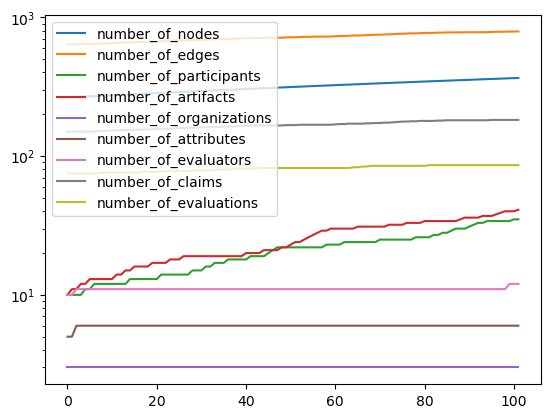

In [29]:
#plot on log scale the metrics on logscale to see the growth of the network
ddf.plot(logy=True)

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 75, 'evaluation': 33}


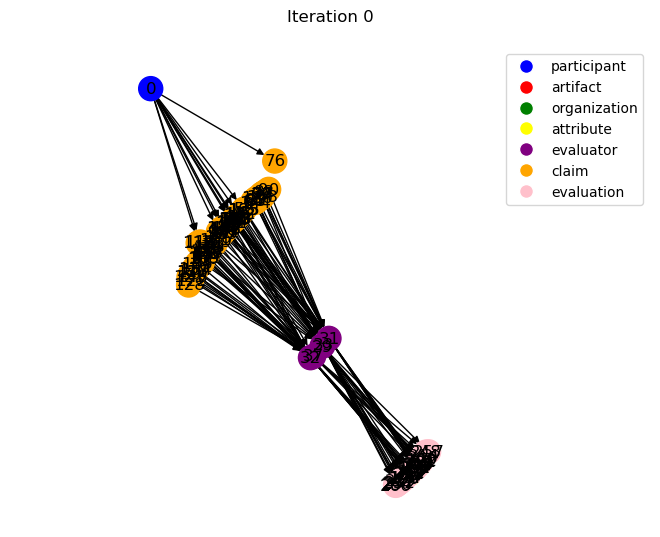

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 77, 'evaluation': 34}


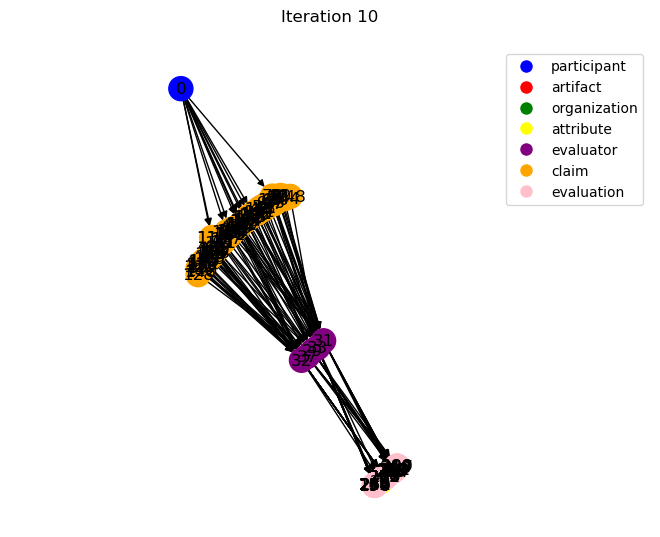

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 80, 'evaluation': 34}


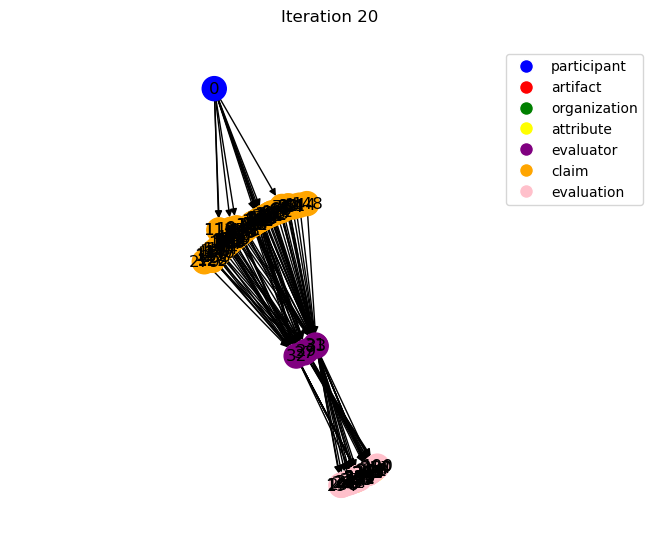

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 80, 'evaluation': 36}


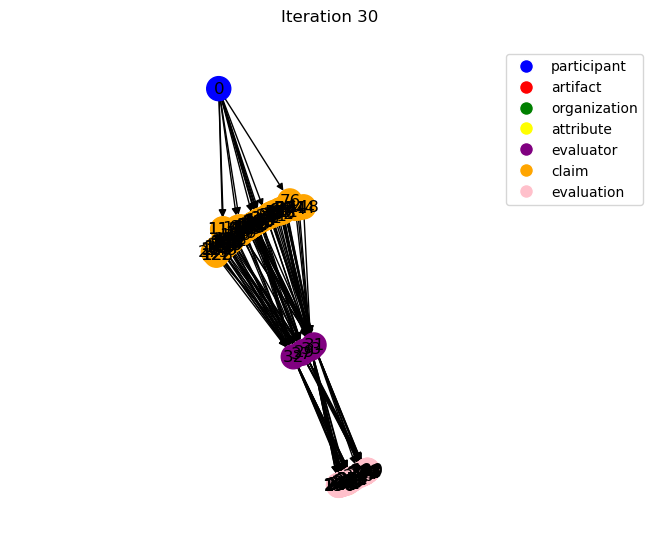

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 82, 'evaluation': 36}


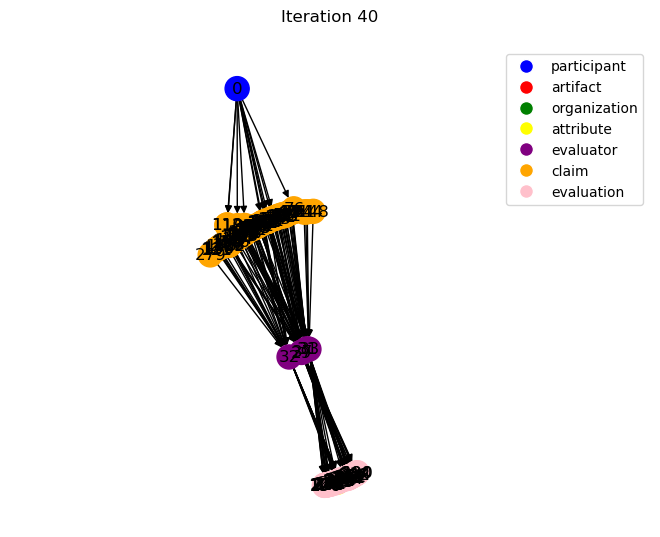

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 82, 'evaluation': 36, 'artifact': 1}


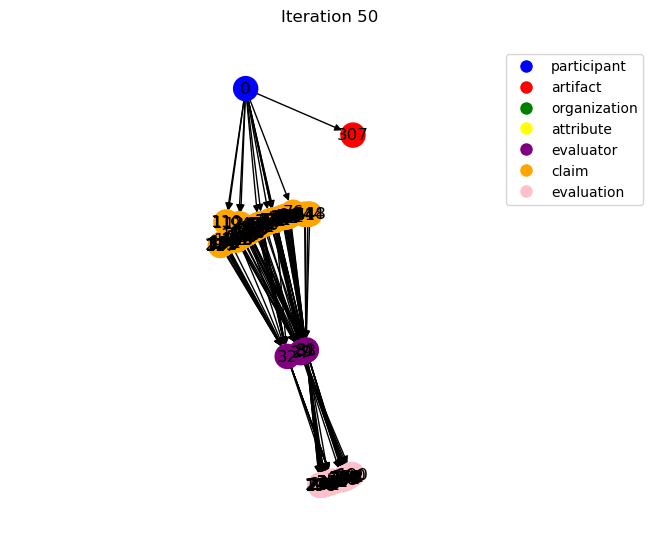

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 83, 'evaluation': 36, 'artifact': 1}


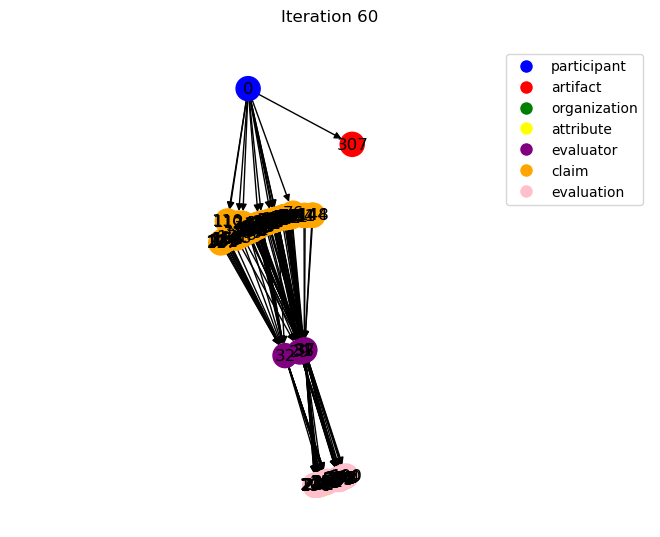

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 85, 'evaluation': 37, 'artifact': 2}


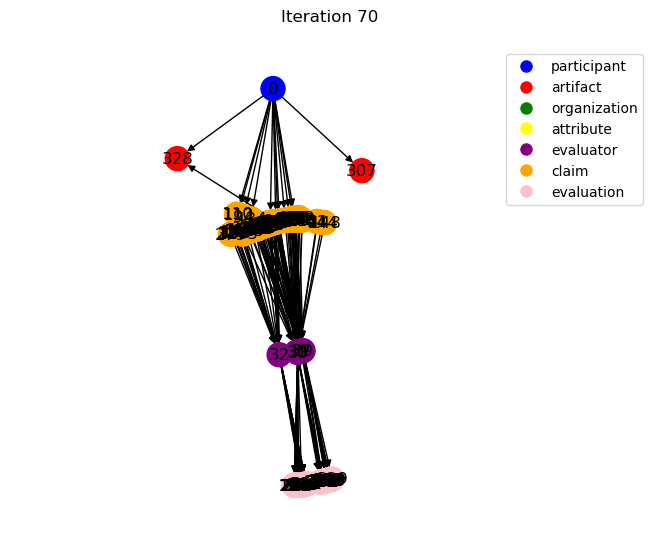

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 87, 'evaluation': 37, 'artifact': 2}


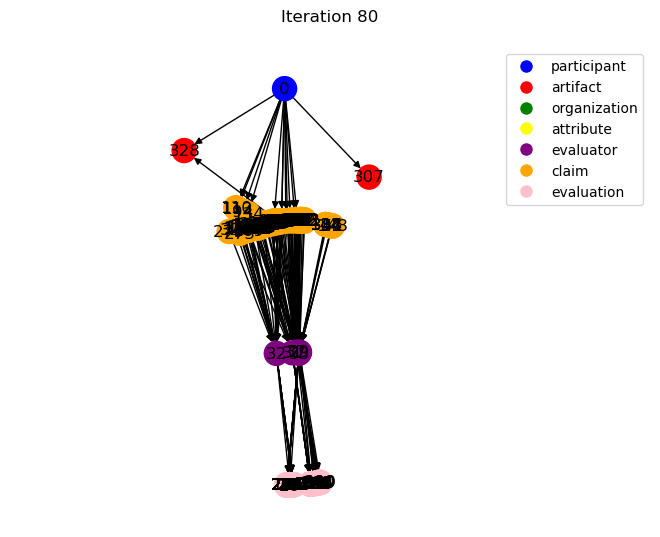

{'participant': 1, 'organization': 1, 'attribute': 2, 'evaluator': 5, 'claim': 88, 'evaluation': 38, 'artifact': 2}


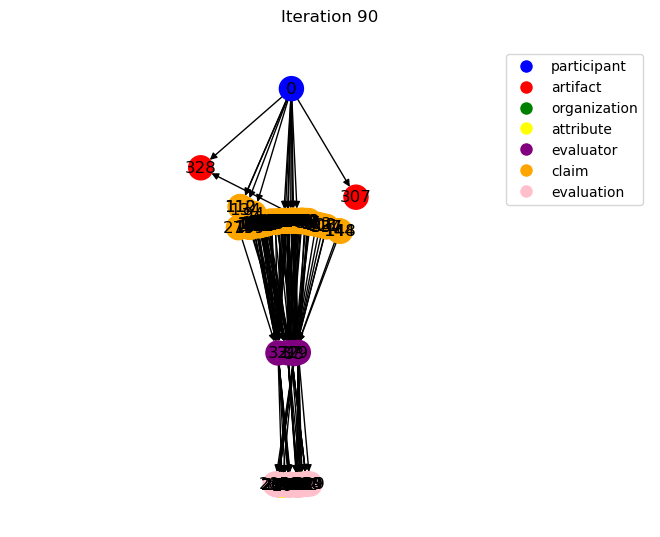

{'participant': 1, 'organization': 1, 'attribute': 3, 'evaluator': 6, 'claim': 88, 'evaluation': 38, 'artifact': 2}


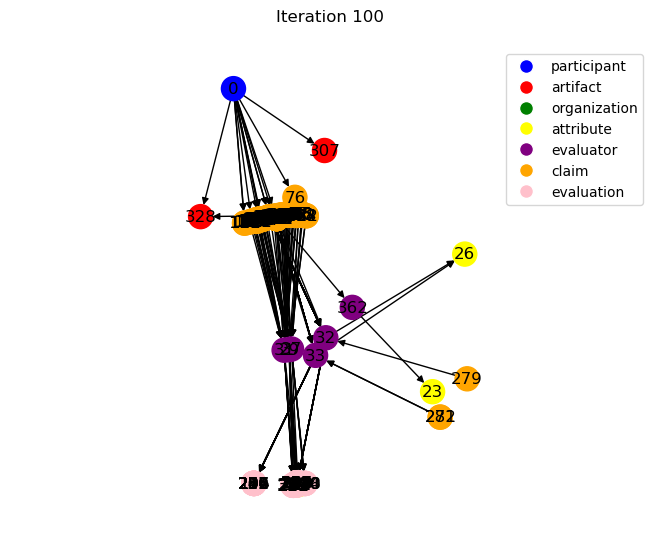

In [30]:
#collect the first org node
organization_node = get_nodes_by_type(network,"organization")[0]

#plot the neighborhood of the org node with depth 2 at every 10th iteration
for i in range(0,iterations,10):
    subgraph = trajectory[i].subgraph(get_neighborhood(trajectory[i],organization_node,2))
    #count up nodes by type in the subgraph
    summary_statistics = {}
    for node in subgraph.nodes:
        node_type = subgraph.nodes[node]['type']
        if node_type in summary_statistics:
            summary_statistics[node_type] += 1
        else:
            summary_statistics[node_type] = 1

    print(summary_statistics)
    plotter(subgraph)
    plt.title("Iteration " + str(i) + "\n")
    plt.show()

{'participant': 1, 'claim': 11, 'organization': 1}


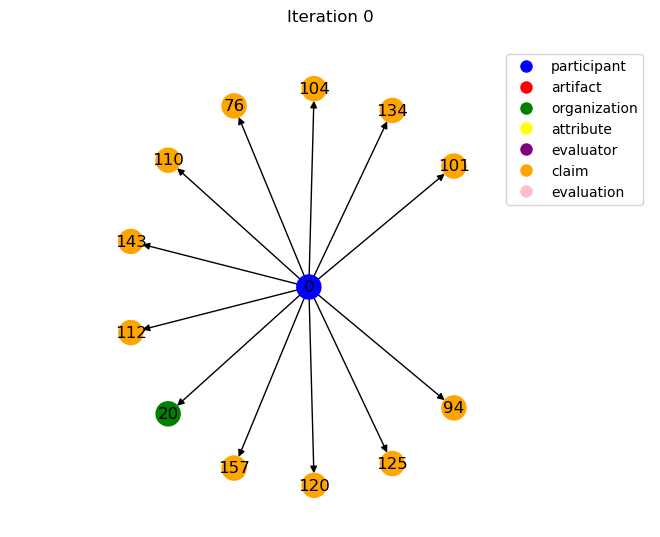

{'participant': 1, 'claim': 11, 'artifact': 1, 'organization': 1}


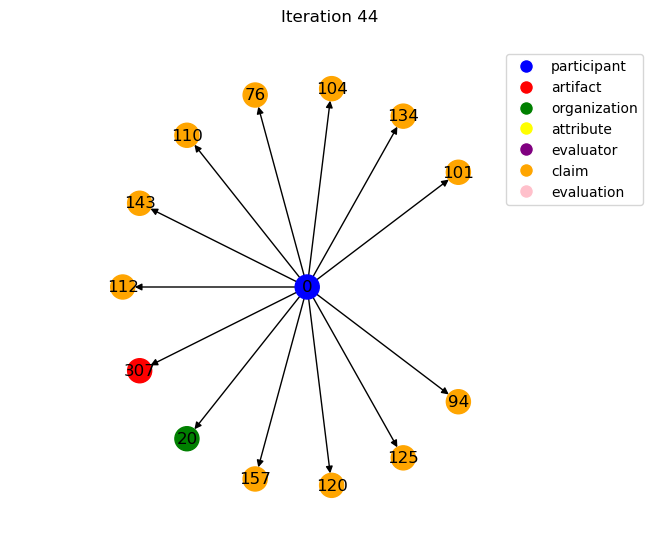

{'participant': 1, 'claim': 11, 'artifact': 2, 'organization': 1}


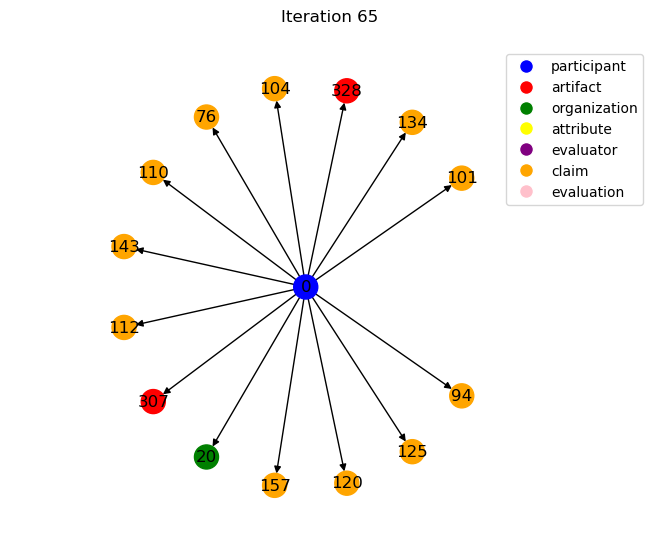

In [36]:
#collect the first org node
participant_node = get_nodes_by_type(network,"participant")[0]

#plot the neighborhood of the org node with depth 1 when the summary stats change
prev_summary_statistics = None
for i in range(0, iterations):
    subgraph = trajectory[i].subgraph(get_neighborhood(trajectory[i], participant_node, 1))
    # count up nodes by type in the subgraph
    summary_statistics = {}
    for node in subgraph.nodes:
        node_type = subgraph.nodes[node]['type']
        if node_type in summary_statistics:
            summary_statistics[node_type] += 1
        else:
            summary_statistics[node_type] = 1

    if summary_statistics != prev_summary_statistics:
        print(summary_statistics)
        plotter(subgraph)
        plt.title("Iteration " + str(i) + "\n")
        plt.show()
        prev_summary_statistics = summary_statistics
